HOG + SVM

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import cv2
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from skimage.transform import resize
from glob import glob
import numpy as np
from skimage.feature import hog
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

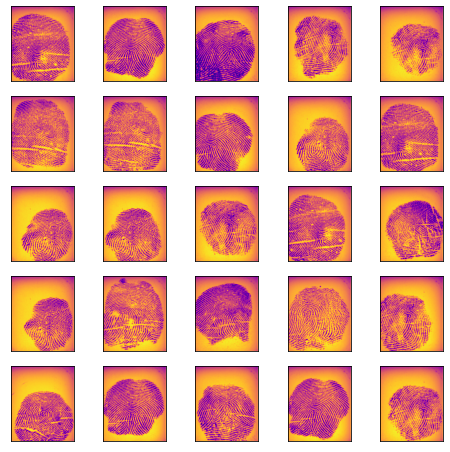

In [ ]:
label_data = []
train_data=[]

images = []

for i in glob("/content/drive/MyDrive/Spoof_data/Spoof_data/Training Biometrika Spoof/Training Biometrika Spoof/spoof/*.png"):
  grayImage = cv2.imread(i,0)
  images.append(grayImage)
  image_data = resize(grayImage,(150,150))
  train_data.append(image_data.flatten())
  label_data.append('Spoof')

for i in glob("/content/drive/MyDrive/Spoof_data/Spoof_data/Training Biometrika Live/live/*.png"):
  grayImage = cv2.imread(i,0)
  images.append(grayImage)
  image_data = resize(grayImage,(150,150))
  train_data.append(image_data.flatten())
  label_data.append('Live')

train_data = np.array(train_data)
label_data = np.array(label_data)


plt.figure(figsize=(8,8))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(images[i], cmap="npy")
plt.show()


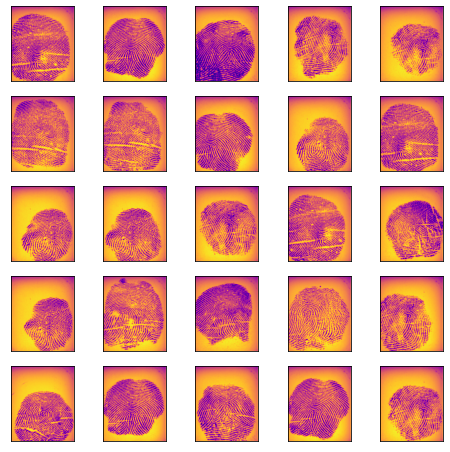

In [ ]:
y_img=[]
y_name=[]

for j in glob("/content/drive/MyDrive/Spoof_data/Spoof_data/Testing Biometrika Spoof/Testing Biometrika Spoof/spoof/*.png"):
  gray_Image = cv2.imread(j,0)
  images.append(gray_Image)
  imageData = resize(gray_Image,(150,150))
  y_img.append(imageData.flatten())
  y_name.append('Spoof')


for j in glob("/content/drive/MyDrive/Spoof_data/Spoof_data/Testing Biometrika Live/live/*.png"):
  gray_Image = cv2.imread(j,0)
  images.append(gray_Image)
  imageData = resize(grayImage,(150,150))
  y_img.append(imageData.flatten())
  y_name.append('Live')



plt.figure(figsize=(8,8))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(images[i], cmap="plasma")
plt.show()


y_test_data = np.array(y_test)
y_label_data = np.array(y_label)

In [ ]:

poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])


In [ ]:
poly_kernel_svm_clf.fit(train_data, label_data)
ypred = poly_kernel_svm_clf.predict(y_test_data)

In [ ]:
cr = classification_report(y_label_data, ypred)
print(cr)

              precision    recall  f1-score   support

        Live       1.00      0.83      0.91       200
       Spoof       0.85      1.00      0.92       200

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.91       400
weighted avg       0.93      0.92      0.91       400

